In [1]:
import numpy as np
import itertools
from itertools import permutations
from itertools import combinations
from itertools import product
import matplotlib.pyplot as plt
import sympy as sp
import copy

#MesonParticle = [coefficient, [flavorstructure]]
pip = [1, [2.2, 1]]
pipB = [1, [1.2, 2]]
pi0 = [[1/(sp.sqrt(2)), [2.2, 2]], [-1/(sp.sqrt(2)), [1.2, 1]]]
pi0B = [[1/(sp.sqrt(2)), [2.2, 2]], [-1/(sp.sqrt(2)), [1.2, 1]]]
pim = [-1, [1.2, 2]]
pimB = [-1, [2.2, 1]]
eta0 = [[1, [2.2, 2]], [1, [1.2, 1]]]
eta0B = [[1, [2.2, 2]], [1, [1.2, 1]]]
kaonp = [1, [3.2, 1]]
kaonpB = [1, [1.2, 3]]
kaonm = [1, [3.2, 2]]
kaonmB = [1, [2.2, 3]]
phi0 = [1, [3.2, 3]]
phi0B = [1, [3.2, 3]]

#BaryonParticle = [coefficient, [flavorstructure]]
deltapp = [1, [1, 1, 1]]
deltappB = [1, [1.2, 1.2, 1.2]]
deltap = [sp.sqrt(3), [1, 1, 2]]
deltapB = [sp.sqrt(3), [2.2, 1.2, 1.2]]
delta0 = [sp.sqrt(3), [1, 2, 2]]
delta0B = [sp.sqrt(3), [2.2, 2.2, 1.2]]
deltam = [1, [2, 2, 2]]
deltamB = [1, [2.2, 2.2, 2.2]]
sigmap = [1, [1, 1, 3]]
sigmapB = [1, [3.2, 1.2, 1.2]]
sigma0 = [sp.sqrt(2), [1, 2, 3]]
sigma0B = [sp.sqrt(2), [3.2, 2.2, 1.2]]
sigmam = [1, [2, 2, 3]]
sigmamB = [1, [3.2, 2.2, 2.2]]
nucleonp = [1, [1, 1, 2]]
nucleonpB = [1, [2.2, 1.2, 1.2]]
nucleon0 = [-1, [2, 2, 1]]
nucleon0B = [-1, [1.2, 2.2, 2.2]]
xi0 = [1, [3, 3, 1]]
xi0B = [1, [1.2, 3.2, 3.2]]
xim = [1, [3, 3, 2]]
ximB = [1, [2.2, 3.2, 3.2]]
lambda0 = [1, [1, 2, 3]]
lambda0B = [1, [3.2, 2.2, 1.2]]
omegam = [1, [3, 3, 3]]
omegamB = [1, [3.2, 3.2, 3.2]]



Deltapp = ["d", deltapp]
DeltappB = ["d", deltappB]
Deltap = ["d", deltap]
DeltapB = ["d", deltapB]
Delta0 = ["d", delta0]
Delta0B = ["d", delta0B]
Deltam = ["d", deltam]
DeltamB = ["d", deltamB]
Sigmap = ["s", sigmap]
SigmapB = ["s", sigmapB]
Sigma0 = ["s", sigma0]
Sigma0B = ["s", sigma0B]
Sigmam = ["s", sigmam]
SigmamB = ["s", sigmamB]
Nucleonp = ["n", nucleonp]
NucleonpB = ["n", nucleonpB]
Nucleon0 = ["n", nucleon0]
Nucleon0B = ["n", nucleon0B]
Xi0 = ["x", xi0]
Xi0B = ["x", xi0B]
Xim = ["x", xim]
XimB = ["x", ximB]
Lambda0 = ["l", lambda0]
Lambda0B = ["l", lambda0B]
Omegam = ["o", omegam]
OmegamB = ["o", omegamB]


Pip = ["M", pip]
PipB = ["M", pipB]
Pi0 = ["M", pi0]
Pi0B = ["M", pi0B]
Pim = ["M", pim]
PimB = ["M", pimB]
Eta0 = ["M", eta0]
Eta0B = ["M", eta0B]
Kaonp = ["M", kaonp]
KaonpB = ["M", kaonpB]
Kaonm = ["M", kaonm]
KaonmB = ["M", kaonmB]
Phi0 = ["M", phi0]
Phi0B = ["M", phi0B]

In [2]:
def Correlator(Sink, Source):

    def sgn(number):
        if number > 0:
            return '+'
        elif number < 0:
            return '-'
        else:
            return '0'

    def permutation_sign(permuted_elements):
        inversions = 0
        nF = len(permuted_elements)
        for i in range(nF):
            for j in range(i + 1, nF):
                if permuted_elements[i] > permuted_elements[j]:
                    inversions += 1
        sign = (-1) ** inversions
        return sign

    def is_valid_contraction(candidate, Start_List):
        all_elements = [elem1 for pairK in candidate for elem1 in pairK]
        return len(set(map(tuple, all_elements))) == len(Start_List)


    
    def Generate_Contraction(Start_List):
        pairs = [list(pair) for pair in combinations(Start_List, 2)]
        possible_pairs = []
        for paar_contraction in pairs:
            if np.abs(paar_contraction[0][0]) == (np.abs(paar_contraction[1][0]) + 0.2) or (np.abs(paar_contraction[0][0]) + 0.2) == np.abs(paar_contraction[1][0]):
                possible_pairs.append(paar_contraction)
        pairs2 = [list(pairX) for pairX in combinations(possible_pairs, len(Start_List) // 2)]
        final_solution = []
        for candidate in pairs2:
            if is_valid_contraction(candidate, Start_List):
                final_solution.append(candidate)
        return final_solution
    
    lSink = len(Sink)
    lSource = len(Source)
    #### Obtain the overall constant z0 ####
    z0 = 1
    total_operator = []
    source_plot = []
    sink_plot = []
    for i in range(lSink):
        z0 *= Sink[i][0]
    for j in range(lSource):
        z0 *= Source[j][0]
    #print("Overall factor: ", z0)
    #### Now combine all operators into one operator ####
    counter = 0
    for i in range(lSink):
        sub_list = []
        for quark in Sink[i][1]:
            sub_list.append([-1 * quark, counter])
            counter += 1
        total_operator.append(sub_list)
        sink_plot.append(sub_list)
    max_counter1 = counter
    counter = 0
    for j in range(lSource):
        sub_list = []
        for quark in Source[j][1]:
            sub_list.append([quark, counter])
            counter += 1
        source_plot.append(sub_list)
        total_operator.append(sub_list)
    max_counter2 = counter
    f_t_o = [quark for hadron in total_operator for quark in hadron]
    lf_t_o = len(f_t_o)
    first_Step = Generate_Contraction(f_t_o)
    second_Step = []
    sinkplot = [element for subliste in sink_plot for element in subliste]
    sourceplot = [element for subliste in source_plot for element in subliste]
    for diagram in first_Step:
        new_diagram = []
        for paar_contraction in diagram:
            if (np.abs(paar_contraction[0][0]) + 0.2) == np.abs(paar_contraction[1][0]):
                new_diagram.append(paar_contraction)
            else:
                new_diagram.append([paar_contraction[1], paar_contraction[0]])
        second_Step.append(new_diagram)
    sign_of_diagram = [0 for _ in second_Step]
    diagram_N = 0
    m_c = max_counter1 + 1
    for diagram in second_Step:
        numbers = []
        for paar_contraction in diagram:
            if paar_contraction[0][0] < 0:
                t1 = paar_contraction[0][1]
            else:
                t1 = paar_contraction[0][1] + m_c
            numbers.append(t1)
            if paar_contraction[1][0] < 0:
                t2 = paar_contraction[1][1]
            else:
                t2 = paar_contraction[1][1] + m_c
            numbers.append(t2)
        sign_of_diagram[diagram_N] = permutation_sign(numbers)
        diagram_N += 1
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.axis('off')
    ax1.set_title("Sink", loc='left')
    shift1 = 0
    shift2 = 0
    for quark in sinkplot:
        if np.abs(quark[0]) == 1:
            ax1.text(0.07, 0.8-shift1, fr'$u(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 1.2:
            ax1.text(0.07, 0.8-shift1, fr'$\overline{{u}}(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 2:
            ax1.text(0.07, 0.8-shift1, fr'$d(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 2.2:
            ax1.text(0.07, 0.8-shift1, fr'$\overline{{d}}(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 3:
            ax1.text(0.07, 0.8-shift1, fr'$s(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 3.2:
            ax1.text(0.07, 0.8-shift1, fr'$\overline{{s}}(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
    ax2.axis('off')
    ax2.set_title("Source", loc='left')
    for quark in sourceplot:
        if np.abs(quark[0]) == 1:
            ax2.text(0.1, 0.8-shift2, fr'$u({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 1.2:
            ax2.text(0.1, 0.8-shift2, fr'$\overline{{u}}({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 2:
            ax2.text(0.1, 0.8-shift2, fr'$d({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 2.2:
            ax2.text(0.1, 0.8-shift2, fr'$\overline{{d}}({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 3:
            ax2.text(0.1, 0.8-shift2, fr'$s({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 3.2:
            ax2.text(0.1, 0.8-shift2, fr'$\overline{{s}}({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
    plt.show()
    last_step = [0 for _ in second_Step]
    for i, diagram in enumerate(second_Step):
        Diagram_Propagator_Form = [0 for _ in diagram]
        for j, pair_contraction in enumerate(diagram):
            if np.abs(pair_contraction[0][0]) == 1:
                quark_line = f"u_quark_propagator({sgn(pair_contraction[0][0])}{pair_contraction[0][1]}|{sgn(pair_contraction[1][0])}{pair_contraction[1][1]})"
            if np.abs(pair_contraction[0][0]) == 2:
                quark_line = f"d_quark_propagator({sgn(pair_contraction[0][0])}{pair_contraction[0][1]}|{sgn(pair_contraction[1][0])}{pair_contraction[1][1]})"
            if np.abs(pair_contraction[0][0]) == 3:
                quark_line = f"s_quark_propagator({sgn(pair_contraction[0][0])}{pair_contraction[0][1]}|{sgn(pair_contraction[1][0])}{pair_contraction[1][1]})"
            Diagram_Propagator_Form[j] = quark_line
        last_step[i] = [sign_of_diagram[i] * z0, "[" + " ".join(Diagram_Propagator_Form) + "]"]
    return last_step

def Correlator_J(senken, quelle):
    def hadron_multiplication(hadrons):
        elements = []
        for item in hadrons:
            if isinstance(item[0], list):
                elements.append(item)
            else:
                elements.append([item])
        result0 = list(product(*elements))
        result = [list(tup) for tup in result0]
        return result
    sink0 = hadron_multiplication(senken)
    lenL = len(sink0)
    source0 = hadron_multiplication(quelle)
    lenR = len(source0)
    number_of_correlators = lenL * lenR
    Total_Wick_Contraction0 = [0 for i in range(number_of_correlators)]
    zeiger = 0
    for iL in range(lenL):
        for iR in range(lenR):
            Sink = sink0[iL]
            Source = source0[iR]
            Total_Wick_Contraction0[zeiger] = Correlator(Sink, Source)
            zeiger += 1
    Total_Wick_Contraction = [Final_element for sublist_1 in Total_Wick_Contraction0 for Final_element in sublist_1]
    return Total_Wick_Contraction

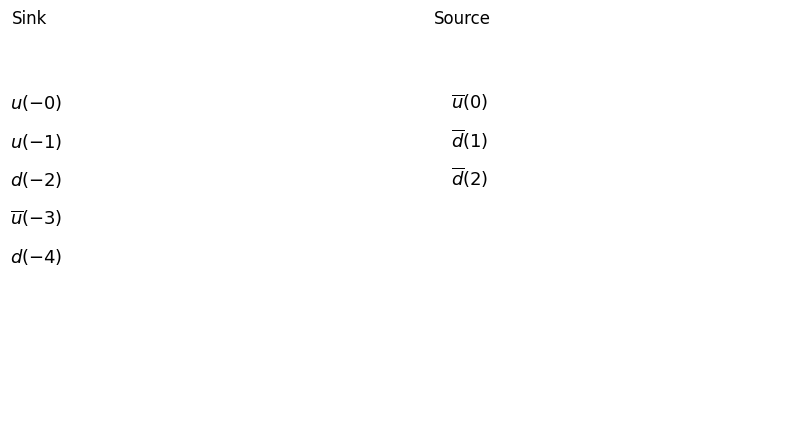

Diagram Number:0  -1 [u_quark_propagator(-0|-3) u_quark_propagator(-1|+0) d_quark_propagator(-2|+1) d_quark_propagator(-4|+2)]
Diagram Number:1  1 [u_quark_propagator(-0|-3) u_quark_propagator(-1|+0) d_quark_propagator(-2|+2) d_quark_propagator(-4|+1)]
Diagram Number:2  1 [u_quark_propagator(-0|+0) u_quark_propagator(-1|-3) d_quark_propagator(-2|+1) d_quark_propagator(-4|+2)]
Diagram Number:3  -1 [u_quark_propagator(-0|+0) u_quark_propagator(-1|-3) d_quark_propagator(-2|+2) d_quark_propagator(-4|+1)]


In [3]:
#To obtain the unsimplified Wick contractions use for the names of the hadrons small letters 
sink = [nucleonp, pim] 
source = [nucleon0B] 
result = Correlator_J(sink, source)
for i, x in enumerate(result):
    print(f"Diagram Number:{i} ", x[0], x[1])